In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("clean_dataset.csv")
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0


In [3]:
dum_var = ["age_group","education","race","sex","income_poverty","marital_status","rent_or_own","employment_status","hhs_geo_region","census_msa"]
dummies =  pd.get_dummies(df, columns= dum_var)

features= dummies.drop(['h1n1_vaccine', 'respondent_id'], axis = 1)
labels = dummies['h1n1_vaccine']


Baseline Models using all attributes

  Name     Score
0   LR  0.834912
1   DT  0.748418
2  GNB  0.767327
3   RF  0.832815
4   GB  0.836747


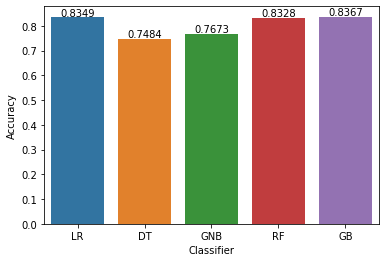

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

names = []
scores = []
for name, model in models:
    kfold = KFold(n_splits=10) 
    score = cross_val_score(model, features, labels, cv=kfold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()


In [58]:
dummies.corrwith(df["h1n1_vaccine"])

respondent_id                              -0.003280
h1n1_concern                                0.121574
h1n1_knowledge                              0.117771
behavioral_antiviral_meds                   0.040226
behavioral_avoidance                        0.046837
behavioral_face_mask                        0.070413
behavioral_wash_hands                       0.074570
behavioral_large_gatherings                 0.018089
behavioral_outside_home                     0.022080
behavioral_touch_face                       0.070855
doctor_recc_h1n1                            0.394086
chronic_med_condition                       0.094360
child_under_6_months                        0.066712
health_worker                               0.168056
opinion_h1n1_vacc_effective                 0.267352
opinion_h1n1_risk                           0.320580
opinion_h1n1_sick_from_vacc                 0.074580
household_adults                            0.007323
household_children                         -0.

Models using only features that show strong correlation to target

In [71]:
#Choosing features that show strong correlation with the target variable

features_2 = dummies[["doctor_recc_h1n1","h1n1_concern", "h1n1_knowledge", "health_worker", "opinion_h1n1_vacc_effective", "opinion_h1n1_risk"]]
labels_2 = dummies["h1n1_vaccine"]


  Name     Score
0   LR  0.831168
1   DT  0.828959
2  GNB  0.796346
3   RF  0.828023
4   GB  0.833677


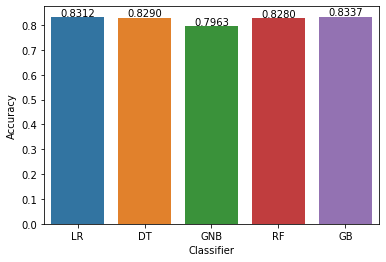

In [75]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

names = []
scores = []
for name, model in models:
    kfold = KFold(n_splits= 5) 
    score = cross_val_score(model, features_2, labels_2, cv=kfold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)
kf_cross_val_2 = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val_2)

axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val_2)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

The best two models are Logistic Regression followed by Gradient Boosting.

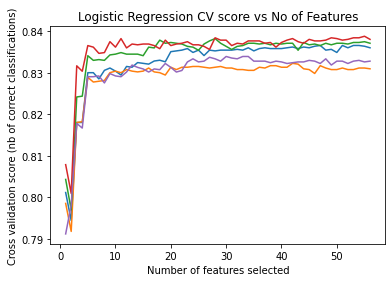

In [61]:
from sklearn.feature_selection import RFECV
import warnings
warnings.filterwarnings('ignore')

logreg_model = LogisticRegression()
rfecv = RFECV(estimator=logreg_model, step=1, cv= 5, scoring='accuracy')
rfecv.fit(features, labels)

plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [62]:
from sklearn.model_selection import cross_val_score

feature_importance = list(zip(features, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

X_new = dummies[new_features]
initial_score = cross_val_score(logreg_model, features, labels, cv= 5, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))
fe_score = cross_val_score(logreg_model, X_new, labels, cv= 5, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))

['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_face_mask', 'behavioral_large_gatherings', 'doctor_recc_h1n1', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'age_group_18 - 34 Years', 'age_group_35 - 44 Years', 'age_group_45 - 54 Years', 'age_group_55 - 64 Years', 'education_< 12 Years', 'education_College Graduate', 'race_Black', 'race_Other or Multiple', 'sex_Female', 'marital_status_Not Married', 'rent_or_own_Rent', 'hhs_geo_region_atmpeygn', 'hhs_geo_region_bhuqouqj', 'hhs_geo_region_dqpwygqj', 'hhs_geo_region_fpwskwrf', 'hhs_geo_region_kbazzjca', 'hhs_geo_region_lzgpxyit']
Initial accuracy : 0.8349871942085871 
Accuracy after Feature Selection : 0.8350995257122079 


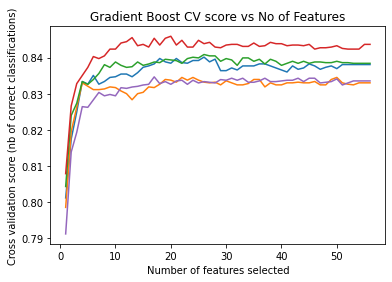

In [63]:
gb_model = GradientBoostingClassifier()
gb_rfecv = RFECV(estimator=gb_model, step=1, cv= 5, scoring='accuracy')
gb_rfecv.fit(features, labels)
plt.figure()
plt.title('Gradient Boost CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(gb_rfecv.grid_scores_) + 1), gb_rfecv.grid_scores_)
plt.show()

In [64]:
feature_importance = list(zip(features, gb_rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

X_new_gb = dummies[new_features]
initial_score = cross_val_score(gb_model, features, labels, cv= 5, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))
fe_score = cross_val_score(gb_model, X_new_gb, labels, cv= 5, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))

['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'doctor_recc_h1n1', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'household_children', 'age_group_18 - 34 Years', 'age_group_55 - 64 Years', 'age_group_65+ Years', 'education_< 12 Years', 'education_College Graduate', 'race_Black', 'race_White', 'sex_Male', 'income_poverty_> $75,000', 'marital_status_Not Married', 'rent_or_own_Rent', 'employment_status_Not in Labor Force']
Initial accuracy : 0.8373461487748577 
Accuracy after Feature Selection : 0.8379078413417925 


Hyperparameter tuning for Logistic Regression

In [66]:
from sklearn.model_selection import GridSearchCV

# Specify parameters
c_values = list(np.arange(1, 10))
param_grid = [
    {'C': c_values, 'penalty': ['l1'], 'solver' : ['liblinear'], 'multi_class' : ['ovr']},
    {'C': c_values, 'penalty': ['l2'], 'solver' : ['liblinear', 'newton-cg', 'lbfgs'], 'multi_class' : ['ovr']}
]

grid = GridSearchCV(LogisticRegression(), param_grid, cv= 5, scoring='accuracy')
grid.fit(X_new, labels)

print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=1, multi_class='ovr', solver='liblinear')


In [68]:
logreg_new = LogisticRegression(C=1, multi_class='ovr', penalty='l2', solver='liblinear')
initial_score = cross_val_score(logreg_new, X_new, labels, cv= 5, scoring='accuracy').mean()
print("Final accuracy : {} ".format(initial_score))

Final accuracy : 0.8352493244162564 


Hyper Parameter Tuning for Gradient Boosting

In [73]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

cv = GridSearchCV(gbc,parameters,cv=5, scoring='accuracy')
cv.fit(X_new_gb,labels)

print(cv.best_params_)
print(cv.best_estimator_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
GradientBoostingClassifier(n_estimators=500)


In [74]:
gb_new = GradientBoostingClassifier(n_estimators = 500, learning_rate= 0.1, max_depth= 3)
initial_score_gb = cross_val_score(gb_new, X_new_gb, labels, cv= 5, scoring='accuracy').mean()
print("Final accuracy : {} ".format(initial_score_gb))

Final accuracy : 0.8382824432484071 
